In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

In [3]:
p_trans = np.zeros([3,3])

In [4]:
# 遷移核：どの状態にあるかの確率
# 0:office, 1:kyukei, 2:jikken
p_trans[0, 0] = 0.1
p_trans[0, 1] = 0.2
p_trans[0, 2] = 0.7
p_trans[1, 0] = 0.1
p_trans[1, 1] = 0.4
p_trans[1, 2] = 0.5
p_trans[2, 0] = 0.3
p_trans[2, 1] = 0.3
p_trans[2, 2] = 0.4

In [5]:
p_trans

array([[0.1, 0.2, 0.7],
       [0.1, 0.4, 0.5],
       [0.3, 0.3, 0.4]])

In [6]:
NMCS = 400  # モンテカルロステップ数（試行回数）
c_state = 0  # 初期状態
c_arr = [c_state]
for i in range(NMCS):
    # np.random.choice(3, 1 なら0,1,2のどれかを選択、pで確率指定
    current = np.random.choice(3, 1, p=p_trans[c_state, :]) 
    c_state = current[0]
    c_arr.append(c_state)
df = pd.DataFrame(c_arr)  # モンテカルロステップごとの状態をデータフレームに

In [7]:
c_state = 0
np.random.choice(3, 1, p=p_trans[c_state, :])

array([2])

In [8]:
df.head()

,0
0,0
1,2
2,0
3,1
4,2


Text(0, 0.5, 'place')

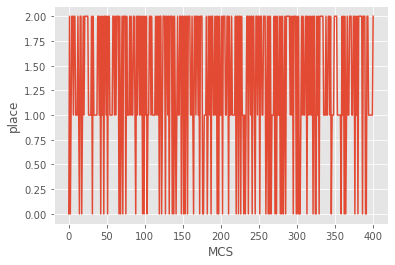

In [9]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("place")

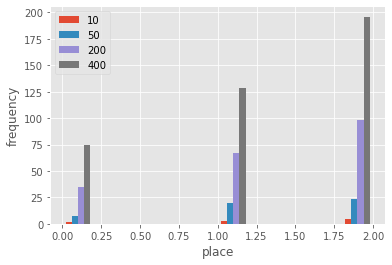

In [10]:
# ステップ数変えても分布変わらない。定常状態
plt.hist([df[0][:10], df[0][:50], df[0][:200], df[0][:400]], label=["10","50","200","400"])
plt.xlabel("place")
plt.ylabel("frequency")
plt.legend()